# 神经网络入门

### 1 神经网络剖析

* 层，多个层组合成网络（或模型）。
* 输入数据和相应的目标。
* 损失函数，即用于学习的反馈信号。
* 优化器，决定学习过程如何进行。

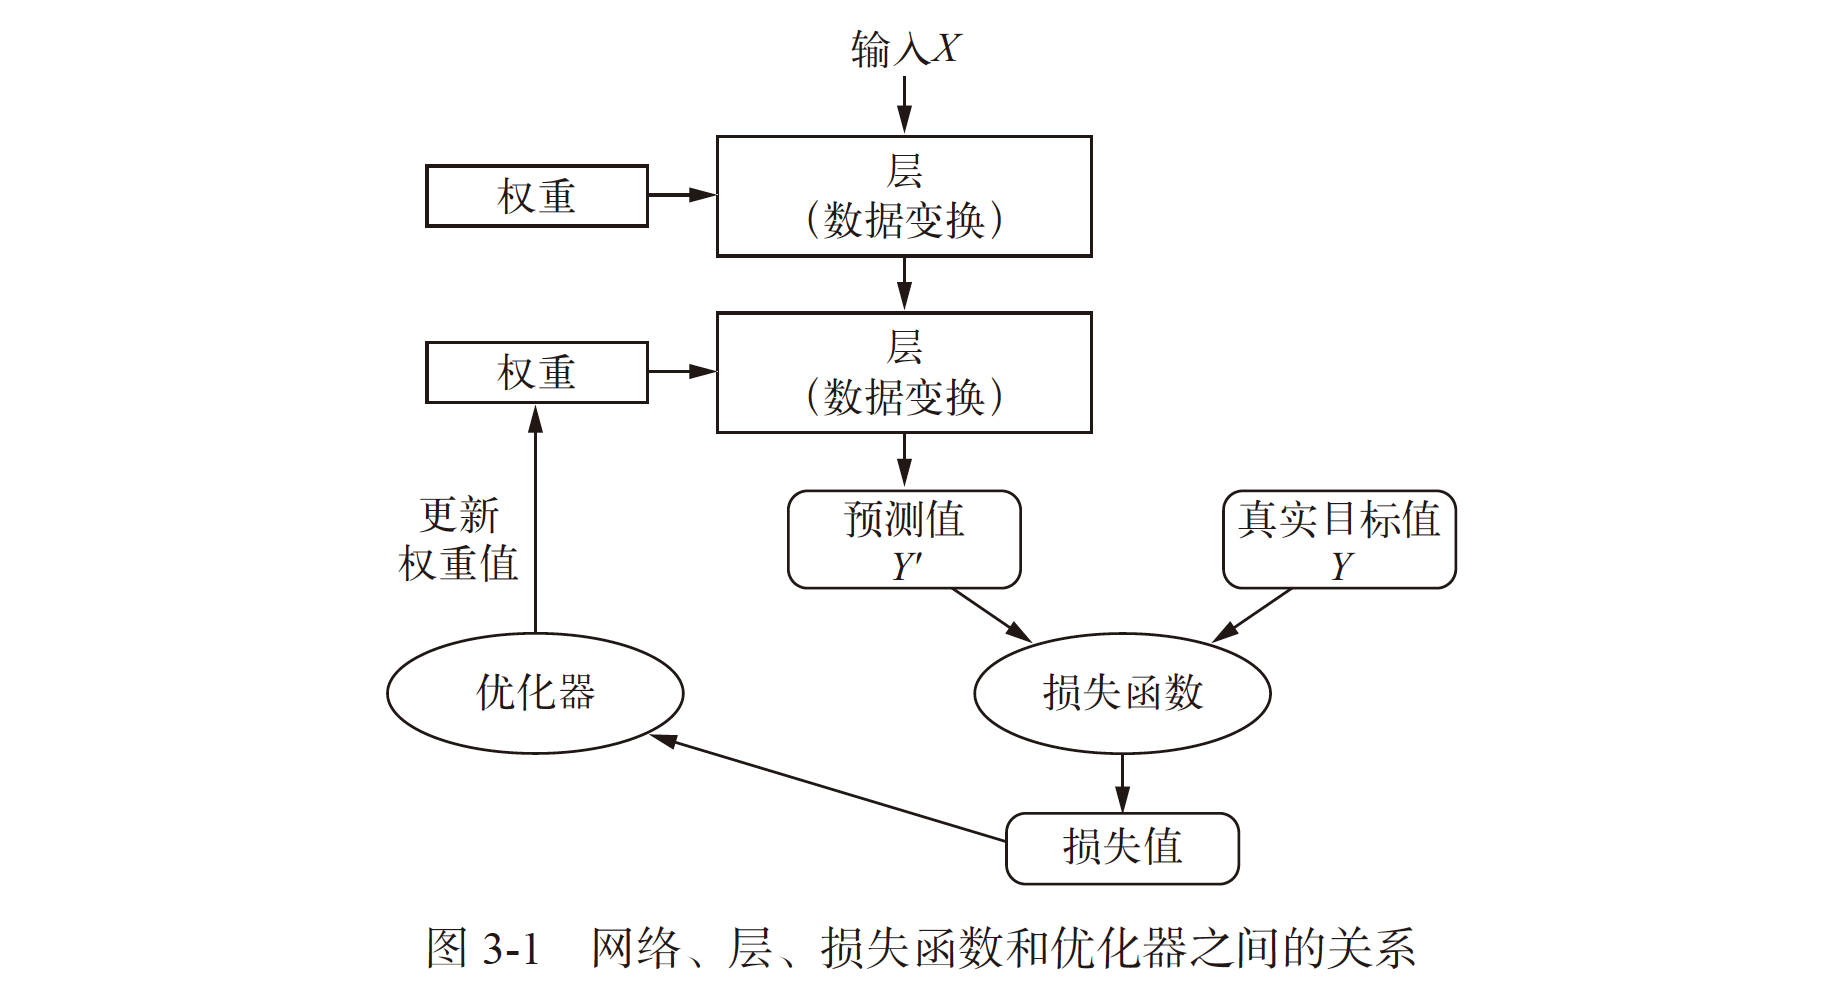

#### 1.1 层：深度学习的基础组件

神经网络的基本数据结构是层。

层是一个数据处理模块，将一个或多个输入张量转换为一个或多个输出张量。有些层是无状态的，但大多数的层是有状态的，即层的权重。权重是利用随机梯度下降学到的一个或多个张量，其中包含网络的知识。

> 不同的张量格式与不同的数据处理类型需要用到不同的层。例如，简单的向量数据保存在形状为(samples, features) 的2D 张量中，通常用密集连接层［densely connected layer，也叫全连接层（fully connected layer）或密集层（dense layer），对应于Keras 的Dense 类］来处理。序列数据保存在形状为(samples, timesteps, features) 的3D 张量中，通常用循环层（recurrent layer，比如Keras 的LSTM 层）来处理。图像数据保存在4D 张量中，通常用二维卷积层（Keras 的Conv2D）来处理。

你可以将层看作深度学习的乐高积木，Keras 等框架则将这种比喻具体化。在Keras 中，构建深度学习模型就是将相互兼容的多个层拼接在一起，以建立有用的数据变换流程。这里层兼容性（layer compatibility）具体指的是每一层只接受特定形状的输入张量，并返回特定形状的输出张量。

In [1]:
from keras import layers

Using TensorFlow backend.


In [2]:
layer = layers.Dense(32, input_shape=(784,)) # 有32个输出单元的密集层，输入维度大小为784

In [3]:
layer

> 创建了一个层，只接受第一个维度大小为784 的2D 张量（第0轴是批量维度，其大小没有指定，因此可以任意取值）作为输入。这个层将返回一个张量，第一个维度的大小变成了32。

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

> 第二层没有输入形状（input_shape）的参数，相反，它可以自动推导出输入形状等于上一层的输出形状。

#### 1.2 模型：层构成的网络

深度学习模型是层构成的有向无环图。最常见的例子就是层的线性堆叠，将单一输入映射为单一输出。

但随着深入学习，你会接触到更多类型的网络拓扑结构。一些常见的网络拓扑结构如下。
* 双分支（two-branch）网络
* 多头（multihead）网络
* Inception模块

网络的拓扑结构定义了一个假设空间（hypothesis space）。选定了网络拓扑结构，意味着将可能性空间（假设空间）限定为一系列特定的张量运算，将输入数据映射为输出数据。然后，你需要为这些张量运算的权重张量找到一组合适的值。

#### 1.3 损失函数与优化器：配置学习过程的关键

一旦确定了网络架构，你还需要选择以下两个参数。
* 损失函数（目标函数）——在训练过程中需要将其最小化。它能够衡量当前任务是否已成功完成。
* 优化器——决定如何基于损失函数对网络进行更新。它执行的是随机梯度下降（SGD）的某个变体。

> 具有多个输出的神经网络可能具有多个损失函数（每个输出对应一个损失函数）。但是，梯度下降过程必须基于单个标量损失值。因此，对于具有多个损失函数的网络，需要将所有损失函数取平均，变为一个标量值。

> 对于二分类问题，你可以使用二元交叉熵（binary crossentropy）损失函数；对于多分类问题，可以用分类交叉熵（categorical crossentropy）损失函数；对于回归问题，可以用均方误差（mean-squared error）损失函数；对于序列学习问题，可以用联结主义时序分类（CTC，connectionist temporal classification）损失函数，等等。只有在面对真正全新的研究问题时，你才需要自主开发目标函数。

### 2 用Keras开发

Keras是一个Python深度学习框架，可以方便地定义和训练几乎所有类型的深度学习模型。

Keras 具有以下重要特性。
* 相同的代码可以在 CPU或 GPU 上无缝切换运行。
* 具有用户友好的 API，便于快速开发深度学习模型的原型。
* 内置支持卷积网络（用于计算机视觉）、循环网络（用于序列处理）以及二者的任意组合。
* 支持任意网络架构：多输入或多输出模型、层共享、模型共享等。这也就是说，Keras能够构建任意深度学习模型，无论是生成式对抗网络还是神经图灵机。

典型的Keras工作流程：  
1. 定义训练数据：输入张量和目标张量。
2. 定义层组成的网络（或模型），将输入映射到目标。
3. 配置学习过程：选择损失函数、优化器和需要监控的指标。
4. 调用模型的fit方法在训练数据上进行迭代。

In [5]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

> 以上是利用Sequential 类定义的两层模型

In [6]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

> 以上是用函数式API 定义的相同模型

In [7]:
# 配置学习过程 指定模型使用的优化器和损失函数，以及训练过程中想要监控的指标
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])

In [8]:
# 学习过程
# model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)